In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

In [11]:
train_data = pd.read_csv('Interview AI Dataset.csv')

In [12]:
train_data.head()

,Unique ID,Country IDs,Country Names,Age,Industry,Years of Experience,Job Title,Education,Knows English,Number of Connections,Endorsements,Profile Picture,Volunteer Experience,WFH,Company Type,Company Size,YOE in Current Company,Received Promotion,Number of People Under,Salary
0,1.0,5.0,Australia,23.0,Manufacturing,3.0,Software Engineer,Bachelor,1.0,515.0,31.0,0.0,0.0,0.0,Private,10000.0,1.0,1,0.0,122070.20
1,2.0,1.0,USA,35.0,Retail,7.0,Doctor,Bachelor,1.0,4.0,0.0,0.0,1.0,0.0,Private,10.0,3.0,0,0.0,69986.76
2,3.0,4.0,Canada,32.0,Finance,22.0,Business Analyst,PhD,1.0,203.0,10.0,0.0,0.0,0.0,Public,100.0,12.0,0,0.0,131893.80
3,4.0,4.0,Canada,28.0,Tech,10.0,Marketing Associate,Bachelor,1.0,89.0,5.0,1.0,0.0,1.0,Non-profit,100.0,7.0,0,0.0,83108.47
4,5.0,4.0,Canada,31.0,Education,20.0,Professor,Bachelor,1.0,45.0,1.0,1.0,1.0,1.0,Non-profit,10000.0,17.0,0,37.0,117729.30


In [16]:
null_counts = train_data.isnull().sum()
null_counts

Unique ID                 6
Country IDs               2
Country Names             0
Age                       3
Industry                  0
Years of Experience       3
Job Title                 3
Education                 3
Knows English             1
Number of Connections     2
Endorsements              3
Profile Picture           3
Volunteer Experience      1
WFH                       4
Company Type              5
Company Size              2
YOE in Current Company    3
Received Promotion        0
Number of People Under    4
Salary                    0
dtype: int64

In [41]:
columns_with_missing = ["Country IDs", "Age", "Years of Experience", "Job Title", 
                        "Education", "Knows English", "Number of Connections", 
                        "Endorsements", "Profile Picture", "Volunteer Experience", 
                        "WFH", "Company Type", "Company Size", "YOE in Current Company", 
                        "Number of People Under"]

In [22]:
for column in columns_with_missing:
    if train_data[column].dtype == "object":
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    else:
        imputer = SimpleImputer(strategy="median")
        train_data[column] = imputer.fit_transform(train_data[[column]])

In [24]:
print(train_data.isnull().sum())

Unique ID                 6
Country IDs               0
Country Names             0
Age                       0
Industry                  0
Years of Experience       0
Job Title                 0
Education                 0
Knows English             0
Number of Connections     0
Endorsements              0
Profile Picture           0
Volunteer Experience      0
WFH                       0
Company Type              0
Company Size              0
YOE in Current Company    0
Received Promotion        0
Number of People Under    0
Salary                    0
dtype: int64


In [26]:
train_data.to_csv("cleaned_dataset.csv", index=False)

In [30]:
new_data = pd.read_csv('cleaned_dataset.csv')

In [31]:
new_data.head()

,Unique ID,Country IDs,Country Names,Age,Industry,Years of Experience,Job Title,Education,Knows English,Number of Connections,Endorsements,Profile Picture,Volunteer Experience,WFH,Company Type,Company Size,YOE in Current Company,Received Promotion,Number of People Under,Salary
0,1.0,5.0,Australia,23.0,Manufacturing,3.0,Software Engineer,Bachelor,1.0,515.0,31.0,0.0,0.0,0.0,Private,10000.0,1.0,1,0.0,122070.20
1,2.0,1.0,USA,35.0,Retail,7.0,Doctor,Bachelor,1.0,4.0,0.0,0.0,1.0,0.0,Private,10.0,3.0,0,0.0,69986.76
2,3.0,4.0,Canada,32.0,Finance,22.0,Business Analyst,PhD,1.0,203.0,10.0,0.0,0.0,0.0,Public,100.0,12.0,0,0.0,131893.80
3,4.0,4.0,Canada,28.0,Tech,10.0,Marketing Associate,Bachelor,1.0,89.0,5.0,1.0,0.0,1.0,Non-profit,100.0,7.0,0,0.0,83108.47
4,5.0,4.0,Canada,31.0,Education,20.0,Professor,Bachelor,1.0,45.0,1.0,1.0,1.0,1.0,Non-profit,10000.0,17.0,0,37.0,117729.30


In [61]:
def calculate_nrmse(original_values, imputed_values):
    squared_errors = (original_values - imputed_values) ** 2
    nrmse = np.sqrt(np.mean(squared_errors) / (np.max(original_values) - np.min(original_values)))
    return nrmse

In [63]:
nrmse_values = []


numeric_variables = ["Age", "Years of Experience", "Number of Connections", "Salary"]


for variable in numeric_variables:
    original_values = train_data[variable]  
    imputed_values = new_data[variable]  
    nrmse = calculate_nrmse(original_values, imputed_values)
    nrmse_values.append(nrmse)


In [66]:
mean_nrmse = np.mean(nrmse_values)
mean_nrmse

0.0

In [72]:
z_scores = np.abs(stats.zscore(new_data.select_dtypes(include=[np.number])))
threshold = 3

In [73]:
outlier_indices = np.where(z_scores > threshold)

In [74]:
outlier_variables = new_data.columns[outlier_indices[1]]

In [75]:
print("Variables with Outliers:", outlier_variables)

Variables with Outliers: Index(['WFH', 'WFH', 'Company Type', 'Job Title', 'WFH', 'Company Type',
       'Job Title', 'Job Title', 'Company Type', 'Profile Picture',
       ...
       'WFH', 'Company Type', 'WFH', 'Company Type', 'WFH', 'Job Title',
       'Company Type', 'WFH', 'WFH', 'WFH'],
      dtype='object', length=139)


In [84]:
numerical_variables = cleaned_data.select_dtypes(include=[np.number]).drop(['Unique ID', 'Country IDs'], axis=1)

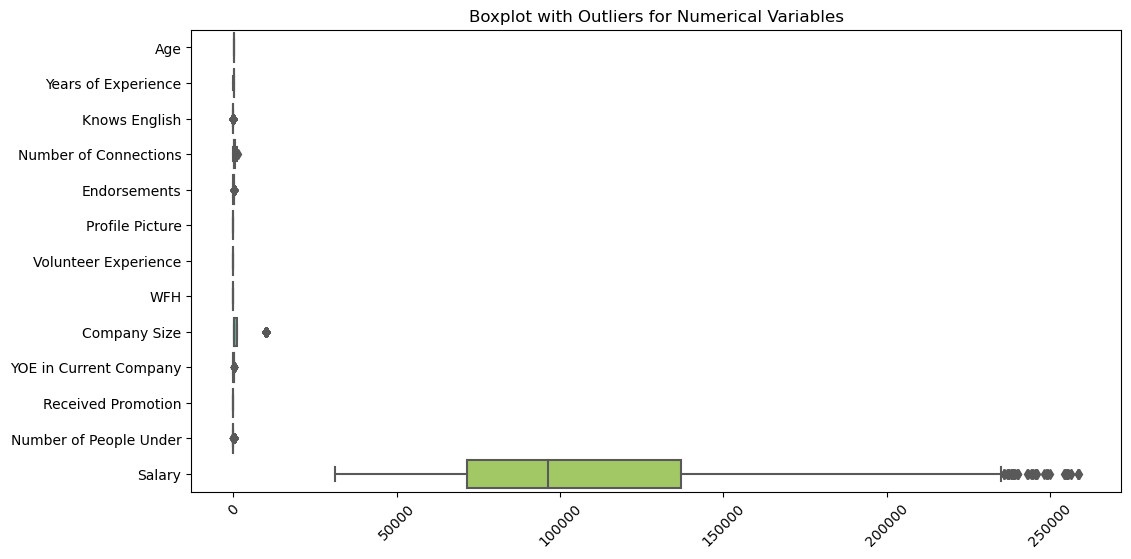

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_variables, orient="h", palette="Set2", showfliers=True)
plt.title("Boxplot with Outliers for Numerical Variables")
plt.xticks(rotation=45)
plt.show()

In [79]:
Q1 = new_data["Salary"].quantile(0.25)
Q3 = new_data["Salary"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = new_data[(new_data["Salary"] < lower_bound) | (new_data["Salary"] > upper_bound)]


cleaned_data = new_data[~new_data.index.isin(outliers.index)]
cleaned_data

,Unique ID,Country IDs,Country Names,Age,Industry,Years of Experience,Job Title,Education,Knows English,Number of Connections,Endorsements,Profile Picture,Volunteer Experience,WFH,Company Type,Company Size,YOE in Current Company,Received Promotion,Number of People Under,Salary
0,1.0,5.0,Australia,23.0,Manufacturing,3.0,Software Engineer,Bachelor,1.0,515.0,31.0,0.0,0.0,0.0,Private,10000.0,1.0,1,0.0,122070.20
1,2.0,1.0,USA,35.0,Retail,7.0,Doctor,Bachelor,1.0,4.0,0.0,0.0,1.0,0.0,Private,10.0,3.0,0,0.0,69986.76
2,3.0,4.0,Canada,32.0,Finance,22.0,Business Analyst,PhD,1.0,203.0,10.0,0.0,0.0,0.0,Public,100.0,12.0,0,0.0,131893.80
3,4.0,4.0,Canada,28.0,Tech,10.0,Marketing Associate,Bachelor,1.0,89.0,5.0,1.0,0.0,1.0,Non-profit,100.0,7.0,0,0.0,83108.47
4,5.0,4.0,Canada,31.0,Education,20.0,Professor,Bachelor,1.0,45.0,1.0,1.0,1.0,1.0,Non-profit,10000.0,17.0,0,37.0,117729.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996.0,3.0,India,29.0,Retail,21.0,Product Manager,Master,0.0,983.0,11.0,0.0,0.0,1.0,Private,10000.0,13.0,0,4.0,104673.00
1996,1997.0,4.0,Canada,26.0,Retail,10.0,Doctor,Bachelor,1.0,49.0,0.0,0.0,0.0,1.0,Public,100.0,5.0,1,0.0,62200.72
1997,1998.0,4.0,Canada,31.0,Finance,22.0,Data Scientist,PhD,1.0,527.0,38.0,0.0,1.0,1.0,Private,1000.0,17.0,1,0.0,223024.80
1998,1999.0,3.0,India,34.0,Education,32.0,Data Scientist,PhD,0.0,957.0,31.0,1.0,0.0,0.0,Startup,10000.0,4.0,1,0.0,168606.30


In [81]:
numerical_features = cleaned_data.select_dtypes(include=[np.number])

In [87]:
correlation_matrix = numerical_features.corr()
correlation_matrix

,Unique ID,Country IDs,Age,Years of Experience,Knows English,Number of Connections,Endorsements,Profile Picture,Volunteer Experience,WFH,Company Size,YOE in Current Company,Received Promotion,Number of People Under,Salary
Unique ID,1.000000,0.007110,-0.028820,0.021922,-0.014719,0.026235,-0.000278,-0.023892,0.045256,0.014326,0.007011,0.024711,-0.019293,0.012901,0.017644
Country IDs,0.007110,1.000000,0.023657,0.002837,0.010345,0.035672,0.037755,0.015770,-0.026999,0.059832,0.018171,0.004000,-0.013323,0.031558,0.008445
Age,-0.028820,0.023657,1.000000,0.220085,-0.033507,0.012907,0.003780,0.000664,0.000010,0.014087,0.004534,0.136478,0.035960,-0.037597,0.034322
Years of Experience,0.021922,0.002837,0.220085,1.000000,-0.030548,-0.048233,-0.053415,-0.025388,-0.013347,0.017108,0.016220,0.659986,-0.023097,-0.027068,0.228045
Knows English,-0.014719,0.010345,-0.033507,-0.030548,1.000000,-0.039385,-0.038053,-0.014938,-0.029138,-0.021928,-0.025263,-0.029164,0.008025,0.037957,0.373377
Number of Connections,0.026235,0.035672,0.012907,-0.048233,-0.039385,1.000000,0.738335,0.009393,-0.010736,-0.006846,0.008777,-0.087795,0.000835,-0.047655,0.702582
Endorsements,-0.000278,0.037755,0.003780,-0.053415,-0.038053,0.738335,1.000000,0.005068,-0.015515,-0.019485,-0.004263,-0.098421,0.014938,-0.058969,0.651677
Profile Picture,-0.023892,0.015770,0.000664,-0.025388,-0.014938,0.009393,0.005068,1.000000,-0.010474,-0.009304,0.009838,-0.017945,-0.012335,0.013206,-0.006853
Volunteer Experience,0.045256,-0.026999,0.000010,-0.013347,-0.029138,-0.010736,-0.015515,-0.010474,1.000000,0.044014,0.025683,0.003773,0.037417,-0.005609,-0.022037
WFH,0.014326,0.059832,0.014087,0.017108,-0.021928,-0.006846,-0.019485,-0.009304,0.044014,1.000000,0.008945,0.004634,-0.006774,0.006413,-0.020834


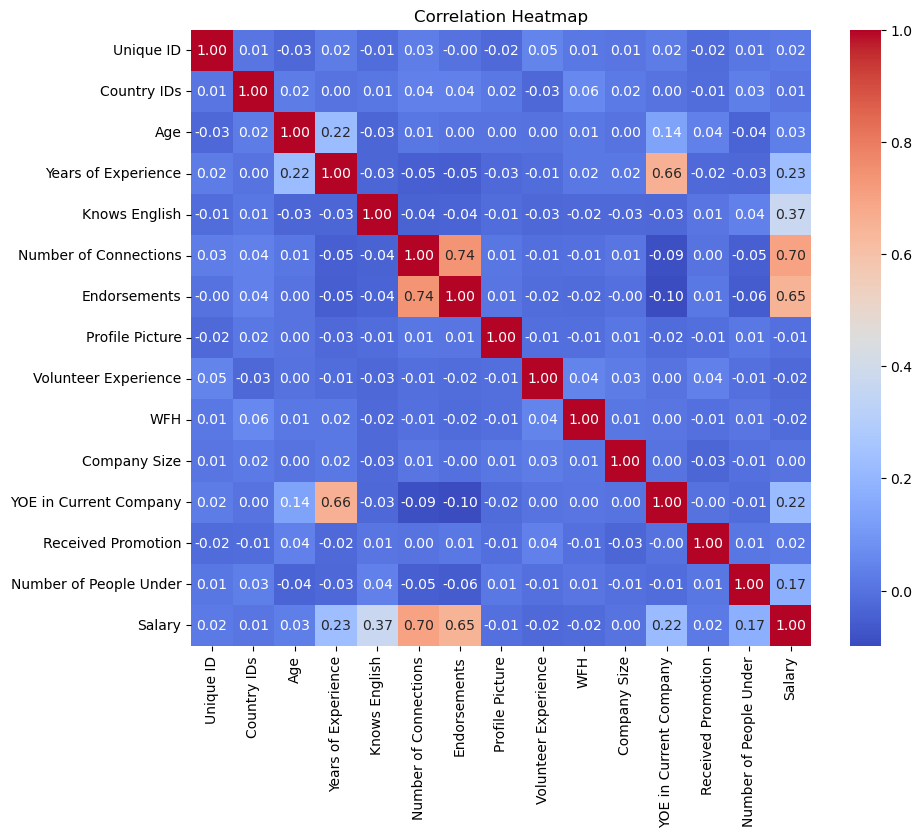

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()